# Going backwards

M C M Wright, ISVR, University of Southampton

In [1]:
%pylab inline
def dog(M, a_max=3, mycolour='m'):
    x_axes = [-a_max, a_max, nan, 0, 0]
    y_axes = [0, 0, nan, -a_max, a_max]
    plot(x_axes, y_axes, 'k-', linewidth=1)

    X = matrix([[0, 2, 2, 1, 0, 0], [0, 0, 2, 1, 1, 0]])

    MX = M*X
    plot(X[0, :].T, X[1,: ].T, 'k-', linewidth=3)
    plot(MX[0, :].T, MX[1,: ].T, '-', linewidth=3, color=mycolour)

    axis('equal')
    axis('off')

Populating the interactive namespace from numpy and matplotlib


## Notebook overview

This notebook introduces the concept of an inverse transformation, and derives the formula for the inverse of a $2\times 2$ matrix. 

## Constructing transformations

Instead of being given a matrix and seeing what transformation it induces, let's start with a transformation and construct a matrix that induces it. Specifically let's try to find the elements of the matrix $\mathbf{R}$ that rotates a figure anticlockwise by $\pi/2$ radians. A sketch tells us that the point $(x,y)$ should be transformed to $(-y,x)$, so

$$
\mathbf{Rx}=\begin{pmatrix} a & b \\ c & d \end{pmatrix}\begin{pmatrix}x\\ y\end{pmatrix} = \begin{pmatrix}-y\\ x\end{pmatrix},
$$

and  therefore

$$
\mathbf{R}=\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}
$$

We'll check by applying it to the dog.

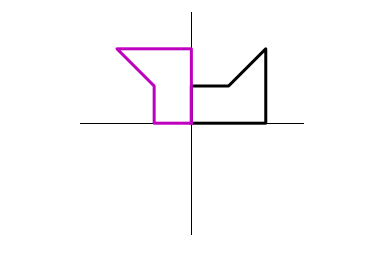

In [2]:
R = matrix([[0, -1], [1, 0]])
dog(R)

We can also predict that if we calculate $\mathbf{R}^4$ we should get $\mathbf{I}$; let's check this.

In [3]:
R**4

matrix([[1, 0],
        [0, 1]])

How about the matrix $\mathbf{T}$ that rotates a figure *clockwise* by $\pi/2$ radians? We could work it out like we did $\mathbf{R}$, or we could just recognise that $\mathbf{T} = \mathbf{R}^3$. We can see that $\mathbf{T}$ is the \emph{inverse} of $\mathbf{R}$, in the sense that each `undoes' the effect of the other, so that $\mathbf{RT} = \mathbf{TR} = \mathbf{I}$. The inverse of $\mathbf{A}$ is written $\mathbf{A}^{-1}$. 

Straight away we can deduce that $\det\left(\mathbf{A}^{-1}\right) = 1/\det\mathbf{A}$. This in turn leads us to the awful realisation that transforming our dog with $\mathbf{S}$ was indeed fatal, because for $\mathbf{S}^{-1}$ to exist it would have to have an infinite determinate, which is not possible with finite-valued elements. So singular matrices can't be inverted.

Since we know that a non-singular matrix induces a one-to-one mapping the same must be true of its inverse.
We can also deduce that the inverse of a non-singular composite transformation such as $\mathbf{AB}$ consists of the inverses of the individual transformations applied in the reverse order, so

$$
(\mathbf{AB})^{-1} = \mathbf{B}^{-1}\mathbf{A}^{-1}.
$$

#### Exercise

Chack that this is the case for $\mathbf{H}$ and $\mathbf{F}$ as defined in earlier notebooks. You can find the inverse of a matrix or array object with `\inv()`.

All that remains is to find an explicit formula for the inverse of a non-singular matrix. If we have

$$
\mathbf{A} = \begin{pmatrix} a & b \\ c & d \end{pmatrix}\quad\text{and}\quad
\mathbf{A}^{-1} = \begin{pmatrix} e & f \\ g & h \end{pmatrix},
$$

such that $\mathbf{A}$ isn't singular, i.e. $ad\neq bc$, then we know that $\mathbf{AA}^{-1}=\mathbf{I}$, or

$$
\begin{pmatrix} a & b \\ c & d \end{pmatrix}\begin{pmatrix} e & f \\ g & h \end{pmatrix} =
\begin{pmatrix} ae+bg & af+bh \\ ce+dg & cf+dh \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}.
$$

which leads us to a set of simultaneous equations:

$$
\begin{align}
ae + bg& = 1,& af+bh &= 0, \\
ce+dg & = 0, & cf+dh & = 1.
\end{align}
$$

Since there are four unknowns ($e$, $f$, $g$ and $h$) and we have four independent equations we can, after enough substituting and eliminating solve them to get

$$
\begin{pmatrix} e & f \\ g & h \end{pmatrix}
=\begin{pmatrix}
 \frac{d}{a d-b c} & -\frac{b}{a d-b c} \\
 -\frac{c}{a d-b c} & \frac{a}{a d-b c}
\end{pmatrix}
=\frac{1}{\det\mathbf{A}}\begin{pmatrix} d & -b \\ -c & a \end{pmatrix}.
$$

#### Exercises

1. Use this formula to confirm that $\mathbf{F}^{-1}=\mathbf{F}$ 
2. Similarly confirm that $\mathbf{R}^{-1}=\mathbf{R}^3$.

The concepts introduced in this and the previous notebooks generalise directly to the $N$-dimensional case, as long as the matrices are still square. Whereas in two dimensions a singular matrix is  a special case that you might consider yourself unlucky to have come across, when the number of dimensions reaches the hundreds or thousands then a full-rank (i.e. non-singular) matrix may (depending on context) become unlikely and elusive. And as we'll see later, a matrix might be technically non-singular but in reality so close to singular that it might as well be. Bear in mind also that in many cases the elements may arise from measured data and will have a certain degree of uncertainty associated with them. 

## Simultaneous equations